<a href="https://colab.research.google.com/github/gcontrerasx/Ciencia-de-Datos-y-ML-con-Python/blob/main/M2_Proyecto_No_3_Inferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto No. 3.
#5 de mayo 2023.


#Estadistica inferencial.

-------------------



#German Contreras Jacinto.
#Jeerson Antonio Maradiaga.
#Katherine Serrano Morales.

-------------------
Generar nuevas variables de valor (De ser necesario)
2do notebook: Aplicar Estadística Inferencial - Trabajar hasta con 5
variables (seleccionar las variables a preferencia).

#Lectura de datos

In [1]:
# instalamos
!pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=0b0169af59d2f26f9010f38af08a8b50a8f96b5c3f683b973f0c410d3c9d9e71
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


In [2]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [3]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
# Subimos a un DataFrame
#Cargamos el archivo utilizado en el proyecto de estadistica descriptiva ya sin datos nulos

df = pd.read_csv('/content/drive/MyDrive/Data - DATA & ANALYTICS/data_nutricion_grupos_final.csv', sep=",")

df = df.drop(df.columns[[0]], axis='columns')

df.head()

,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,16.0,54.6,32.6,23.117479,73.6,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,16.0,58.0,30.1,22.260196,73.6,97.9,0.813075,0.464779,30.276688,40.439521,10.0,19.0,20.0,19.0,A


In [9]:
df.info()  # información detallada de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   edad                         652 non-null    float64
 1   peso_kg                      652 non-null    float64
 2   circun_cuello                652 non-null    float64
 3   IMC                          652 non-null    float64
 4   circun_cintura               652 non-null    float64
 5   cadera                       652 non-null    float64
 6   ind_cintura_cadera           652 non-null    float64
 7   ind_cintura_estatura         652 non-null    float64
 8   por_grasa_corporal           652 non-null    float64
 9   masa_corporal_magra_kg       652 non-null    float64
 10  pliegue_cutaneo_BICEPS       652 non-null    float64
 11  pliegue_cutaneo_TRICEPS      652 non-null    float64
 12  pliegue_cutaneo_ESCAPULAR    652 non-null    float64
 13  pliegue_cutaneo_SUPR

In [17]:
#Extraccion de columnas numericas
cols = df.columns
cols
cols_num=['edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera',
       'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal',
       'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS',
       'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR',
       'pliegue_cutaneo_SUPRAILIACO']

In [32]:
#Datos numéricos
df_num=df.loc[:,cols_num]
df_num

,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,16.0,54.6,32.6,23.117479,73.6,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,16.0,58.0,30.1,22.260196,73.6,97.9,0.813075,0.464779,30.276688,40.439521,10.0,19.0,20.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,14.0,88.0,32.5,21.029381,72.5,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0
648,14.0,48.6,31.5,23.132073,73.0,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0
649,15.0,58.9,31.5,22.769438,85.0,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0
650,14.0,88.7,37.0,27.023922,85.8,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0


#Visualización

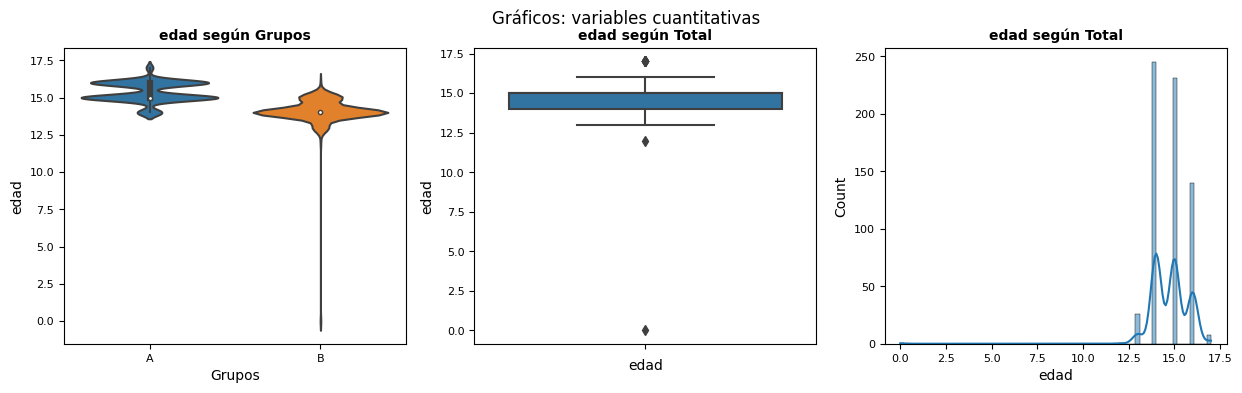

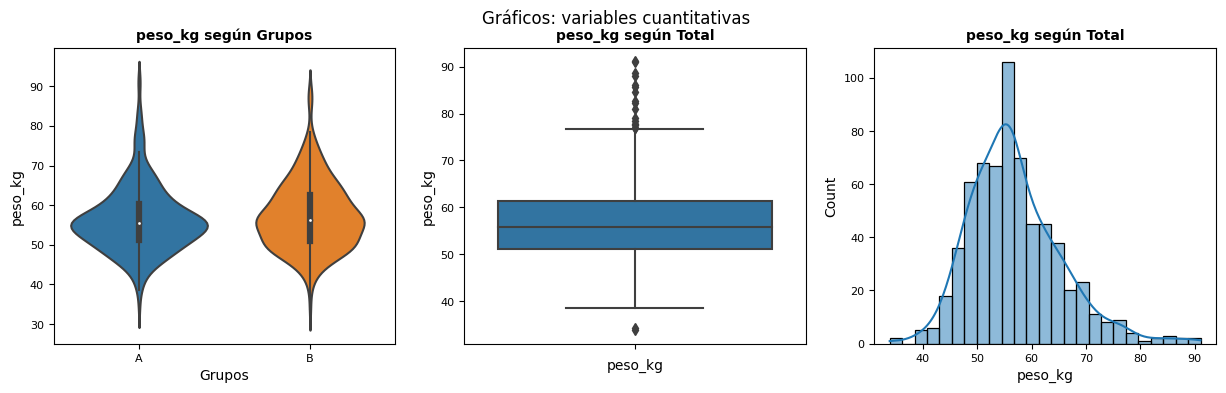

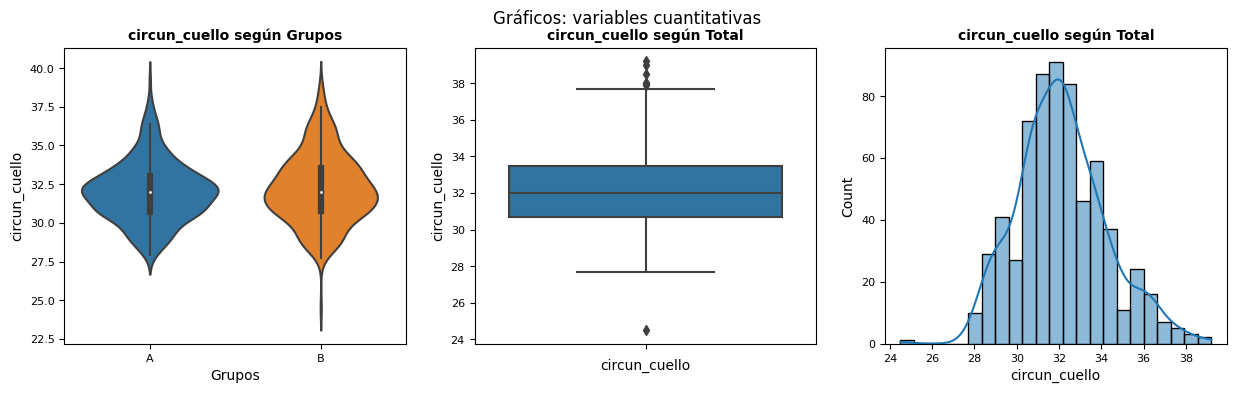

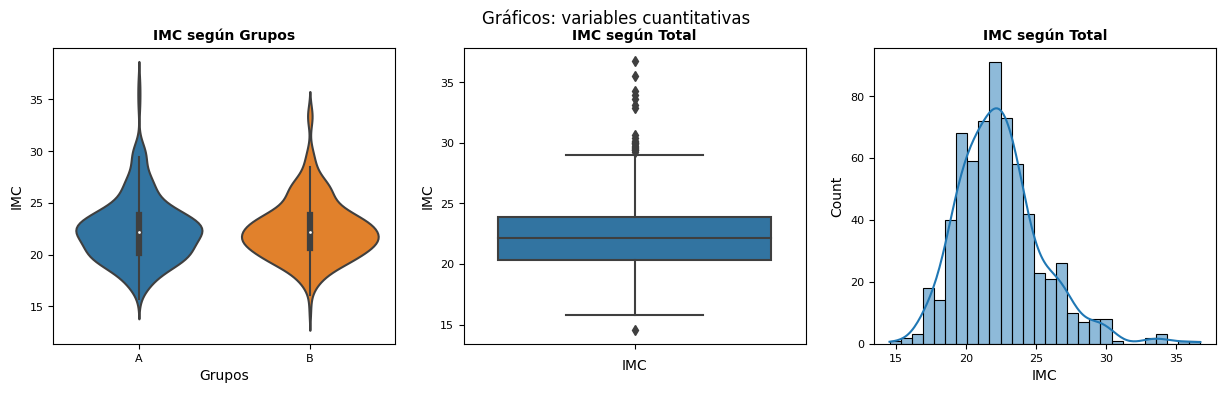

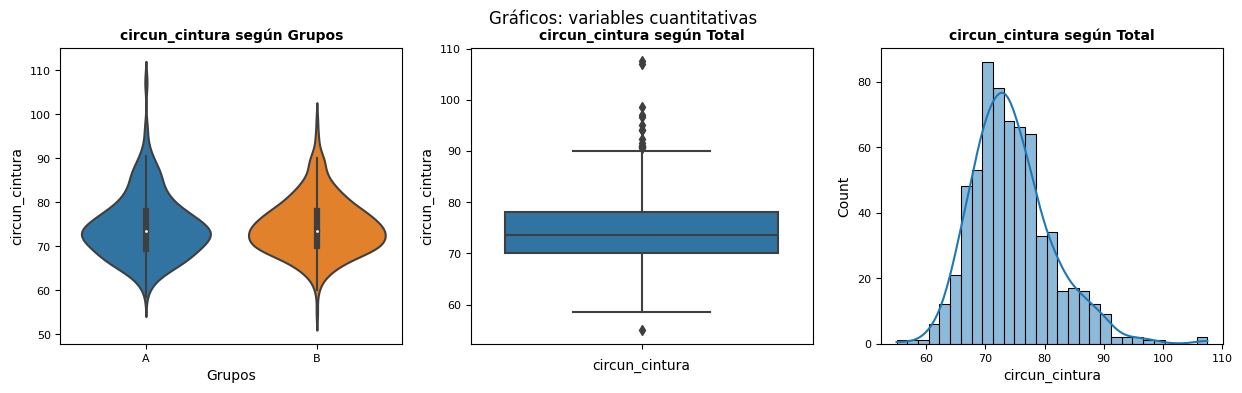

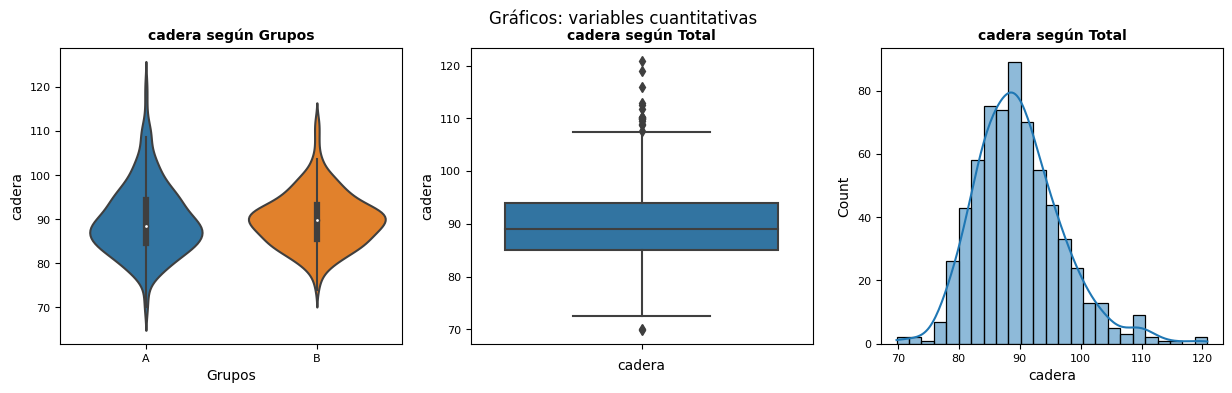

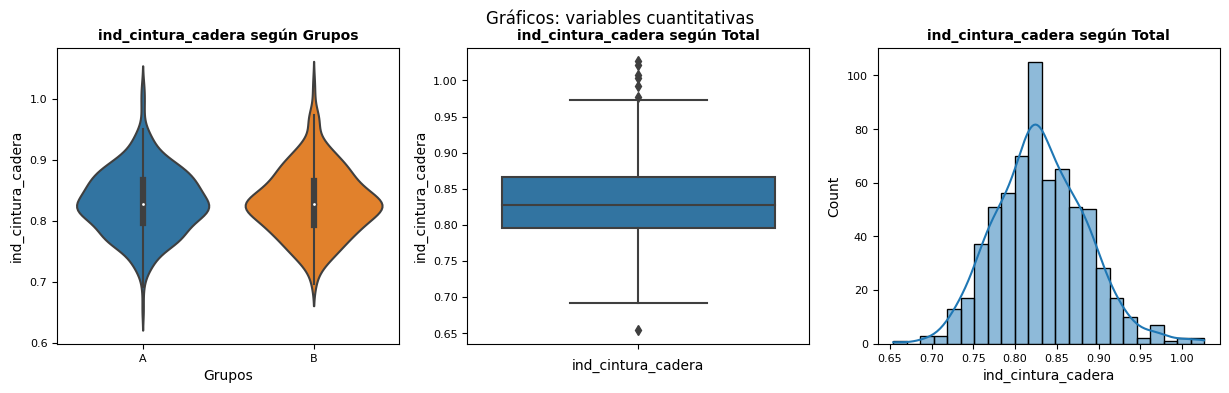

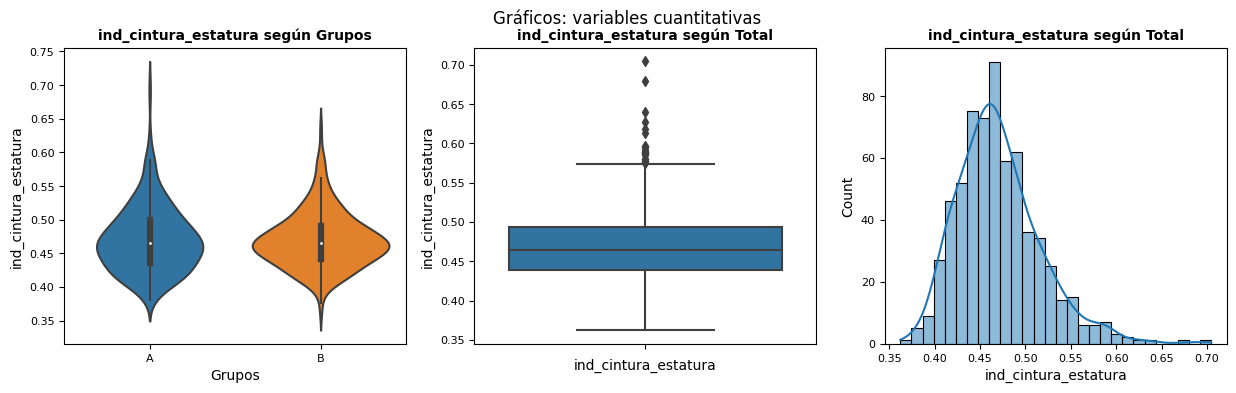

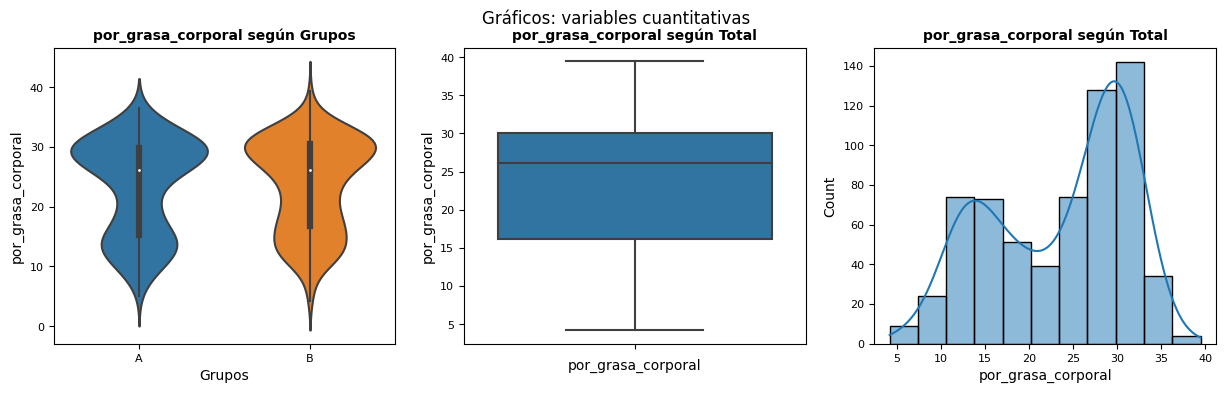

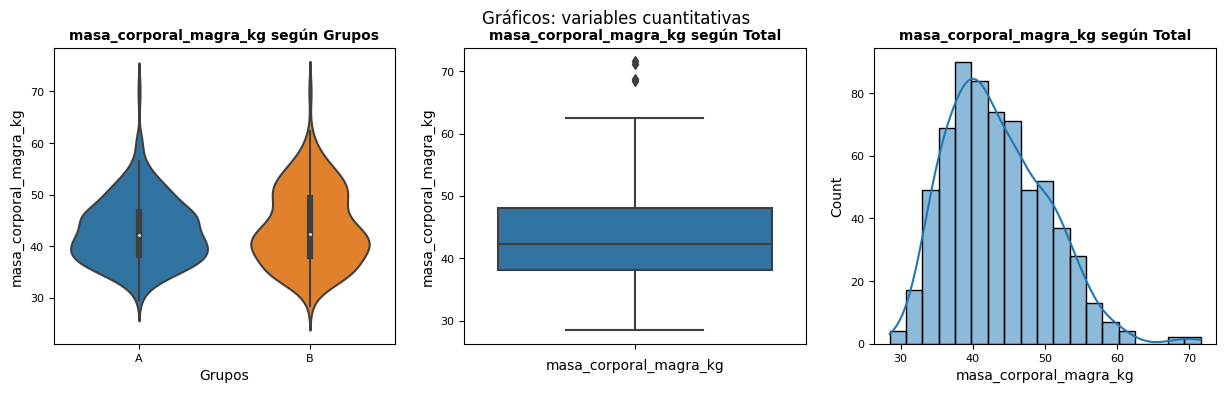

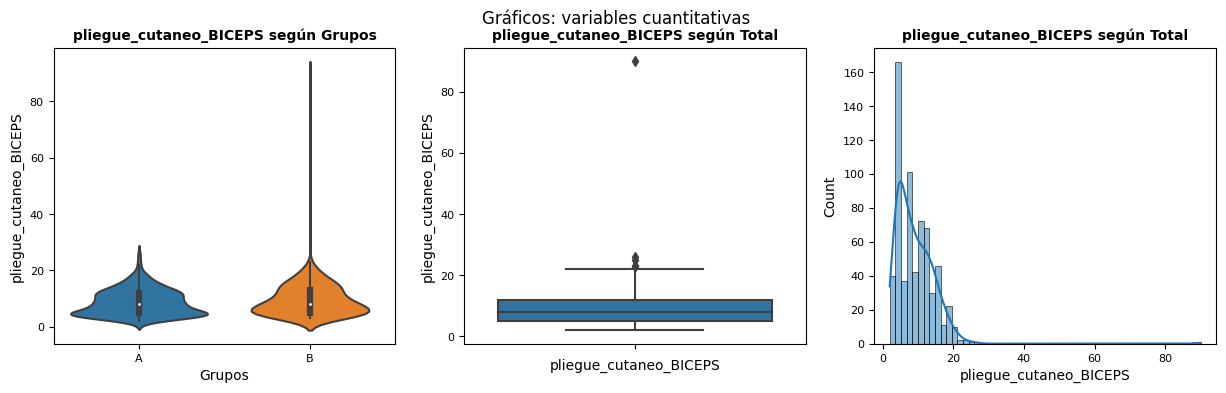

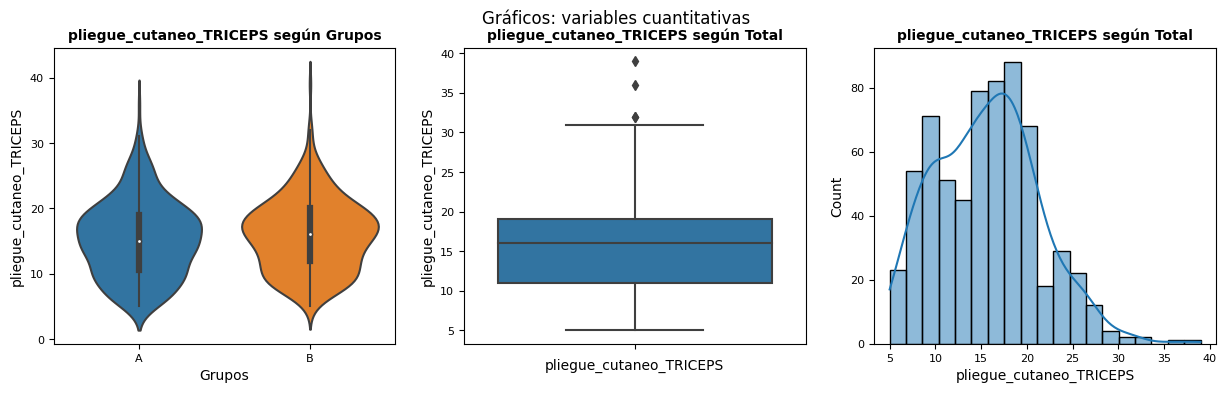

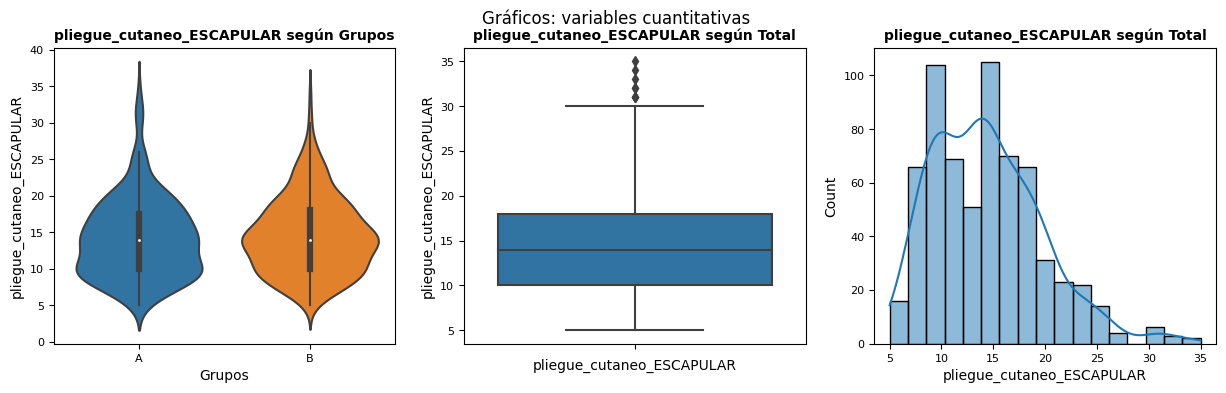

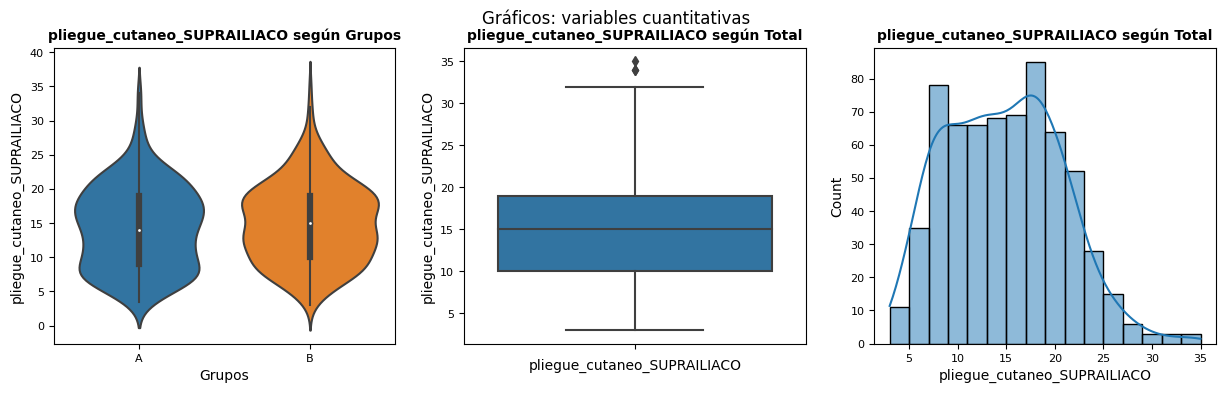

In [18]:
# Graficando las variables cuantitativas


for i, colum in enumerate(cols_num): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')
    
    sns.violinplot(x = 'Grupos', y = colum,  data  = df, ax=ax[0])
    ax[0].set_title(str(colum) + " según Grupos", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('Grupos')

    sns.boxplot(y = colum,  data  = df, ax=ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=df, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

#Análisis descriptivo

In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
edad,652.0,14.756135,1.048901,0.000000,14.000000,15.000000,15.000000,17.000000
peso_kg,652.0,56.903221,8.442418,33.900000,51.200000,55.800000,61.450000,91.100000
circun_cuello,652.0,32.131902,2.108332,24.500000,30.700000,32.000000,33.500000,39.200000
IMC,652.0,22.421825,3.018874,14.537886,20.306828,22.174447,23.855081,36.708603
circun_cintura,652.0,74.496319,6.837227,55.000000,70.000000,73.600000,78.000000,107.500000
cadera,652.0,89.861810,7.183395,69.800000,85.000000,89.000000,94.000000,120.800000
ind_cintura_cadera,652.0,0.830985,0.054173,0.654018,0.795298,0.827897,0.866667,1.026528
ind_cintura_estatura,652.0,0.470474,0.045890,0.362319,0.439406,0.464779,0.493610,0.704411
por_grasa_corporal,652.0,23.546831,7.849954,4.214310,16.127803,26.094372,30.073493,39.445282
masa_corporal_magra_kg,652.0,43.373205,6.908055,28.498090,38.164889,42.357287,48.064794,71.568947


#Prueba de normalidad

PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos      
Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [20]:
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot # prueba de normalidad
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

##Prueba normalidad variable "cadera"

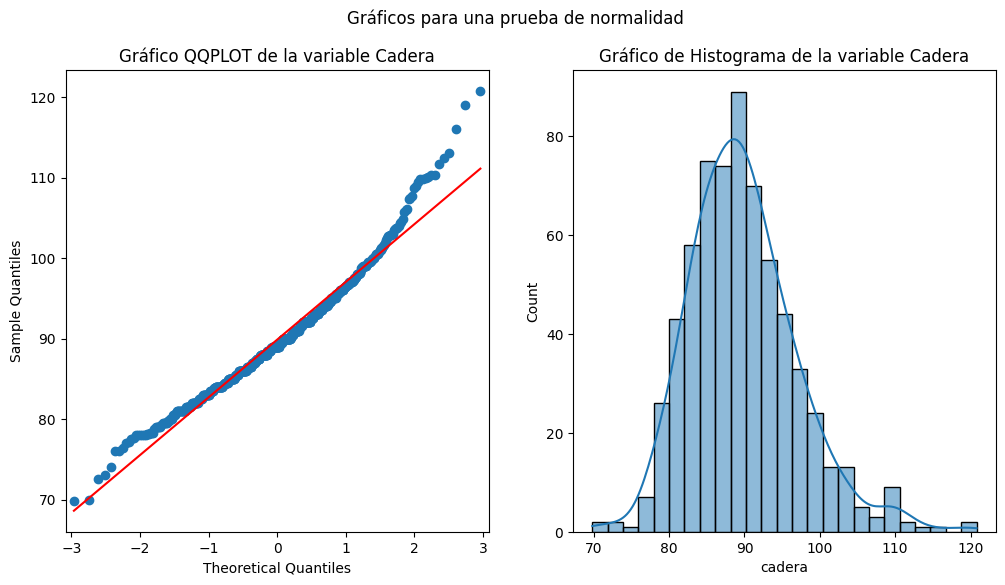

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Cadera')
axes[1].set_title('Gráfico de Histograma de la variable Cadera')

qqplot(df['cadera'] , line='s', ax=axes[0])
sns.histplot(x='cadera', data=df, ax=axes[1], kde= True)
plt.show()

In [23]:
# si es menor de 0.05 rechazamos Ho aceptamos Ha
# no tiene distribucion normal
# Prueba de Shapiro-Wilk (n <= 50)
stat, p = shapiro(df['cadera'])

print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

Estadisticos=0.972, p-value=0.000


In [24]:
# Test de Kolmogorov-Smirnov
# Cuando n > 50
# no tiene distribucion normal, se utiliza prueba no parametrica
stat2, p2 = kstest(df['cadera'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


In [25]:
#Conclusión: 
#Con un nivel de significancia del 5%, se afirma que, los datos de la variables "cadera" no están normalmente distribuidos.

##Prueba normalidad variable "ind_cintura_cadera"

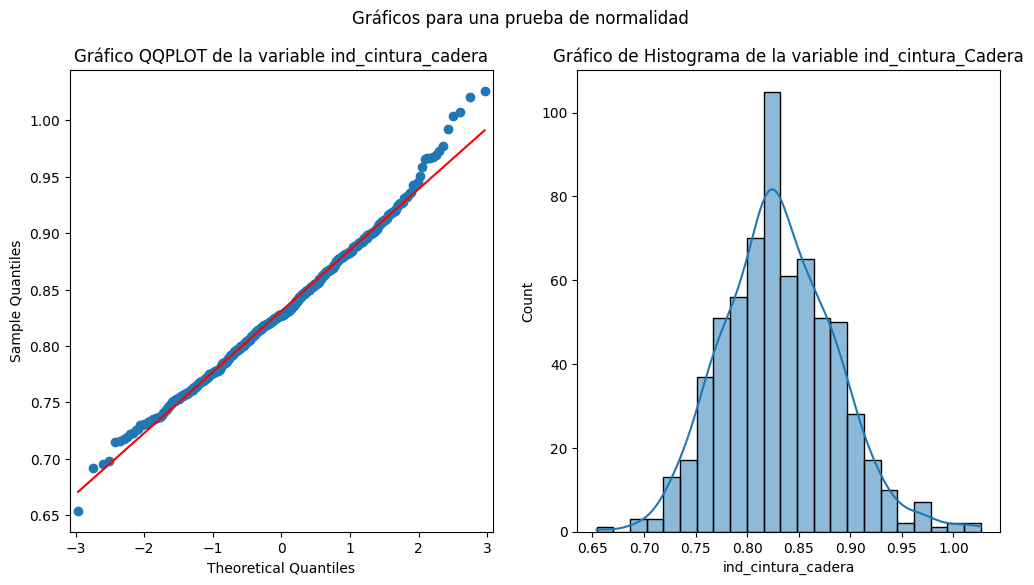

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable ind_cintura_cadera')
axes[1].set_title('Gráfico de Histograma de la variable ind_cintura_Cadera')

qqplot(df['ind_cintura_cadera'] , line='s', ax=axes[0])
sns.histplot(x='ind_cintura_cadera', data=df, ax=axes[1], kde= True)
plt.show()

In [28]:
# Test de Kolmogorov-Smirnov
# Cuando n > 50
# no tiene distribucion normal, se utiliza prueba no parametrica
stat2, p2 = kstest(df['ind_cintura_cadera'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.756, p-value=0.000


In [ ]:
#Conclusión: 
#Con un nivel de significancia del 5%, se afirma que, los datos de la variables "ind_cintura_cadera" no están normalmente distribuidos.

##Prueba normalidad variable "ind_cintura_estatura"

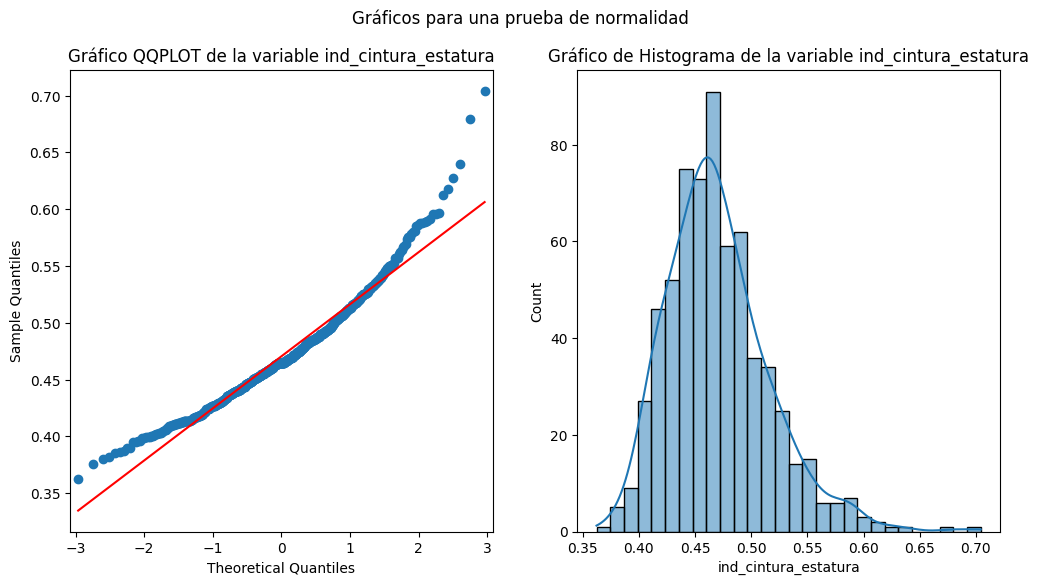

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable ind_cintura_estatura')
axes[1].set_title('Gráfico de Histograma de la variable ind_cintura_estatura')

qqplot(df['ind_cintura_estatura'] , line='s', ax=axes[0])
sns.histplot(x='ind_cintura_estatura', data=df, ax=axes[1], kde= True)
plt.show()

In [30]:
# Test de Kolmogorov-Smirnov
# Cuando n > 50
# no tiene distribucion normal, se utiliza prueba no parametrica
stat2, p2 = kstest(df['ind_cintura_estatura'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.645, p-value=0.000


In [ ]:
#Conclusión: 
#Con un nivel de significancia del 5%, se afirma que, los datos de la variables "ind_cintura_estatura" no están normalmente distribuidos.

## A. Normalizando variables / transformadas

normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_nutricion_norm = scaler.fit_transform(df_num)
data_nutricion_norm

array([[0.94117647, 0.6520979 , 0.76190476, ..., 0.64705882, 0.9       ,
        0.96875   ],
       [0.94117647, 0.47377622, 0.49659864, ..., 0.41176471, 0.33333333,
        0.59375   ],
       [0.94117647, 0.26573427, 0.40816327, ..., 0.38235294, 0.43333333,
        0.4375    ],
       ...,
       [0.88235294, 0.43706294, 0.47619048, ..., 0.20588235, 0.3       ,
        0.46875   ],
       [0.82352941, 0.95804196, 0.85034014, ..., 0.32352941, 0.43333333,
        0.53125   ],
       [0.82352941, 0.41433566, 0.57823129, ..., 0.55882353, 0.5       ,
        0.65625   ]])

In [38]:
data_nutricion_norm=pd.DataFrame(data=data_nutricion_norm, columns=cols_num)
data_nutricion_norm.head()

,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,0.941176,0.652098,0.761905,0.678295,0.666667,0.552941,0.709643,0.630579,0.914874,0.388945,0.125000,0.647059,0.900000,0.96875
1,0.941176,0.473776,0.496599,0.353025,0.493333,0.601961,0.405243,0.361210,0.697579,0.346860,0.034091,0.411765,0.333333,0.59375
2,0.941176,0.265734,0.408163,0.319596,0.323810,0.317647,0.491775,0.331948,0.728141,0.137843,0.125000,0.382353,0.433333,0.43750
3,0.941176,0.361888,0.551020,0.386979,0.354286,0.364706,0.503640,0.374527,0.671379,0.252750,0.034091,0.411765,0.333333,0.46875
4,0.941176,0.421329,0.380952,0.348311,0.354286,0.550980,0.426986,0.299511,0.739758,0.277251,0.090909,0.411765,0.500000,0.50000


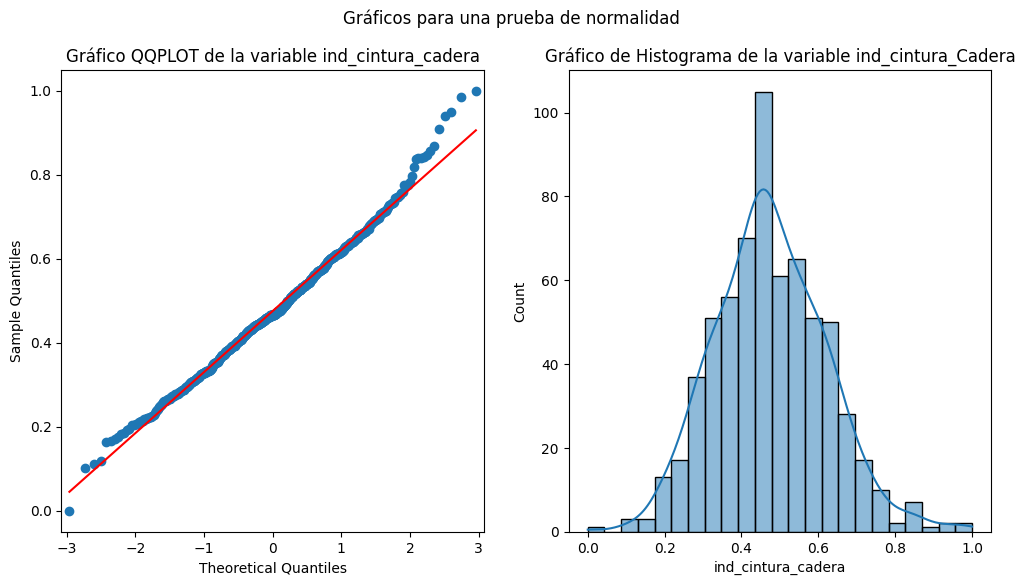

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable ind_cintura_cadera')
axes[1].set_title('Gráfico de Histograma de la variable ind_cintura_Cadera')

qqplot(data_nutricion_norm['ind_cintura_cadera'] , line='s', ax=axes[0])
sns.histplot(x='ind_cintura_cadera', data=data_nutricion_norm, ax=axes[1], kde= True)
plt.show()

In [37]:
# Test de Kolmogorov-Smirnov
# Cuando n > 50

stat2, p2 = kstest(data_nutricion_norm['ind_cintura_cadera'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.562, p-value=0.000


##Estandarización de variables

In [44]:
data_nutricion_estand=zscore(df_num, axis=1)
data_nutricion_estand.info()
data_nutricion_estand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   edad                         652 non-null    float64
 1   peso_kg                      652 non-null    float64
 2   circun_cuello                652 non-null    float64
 3   IMC                          652 non-null    float64
 4   circun_cintura               652 non-null    float64
 5   cadera                       652 non-null    float64
 6   ind_cintura_cadera           652 non-null    float64
 7   ind_cintura_estatura         652 non-null    float64
 8   por_grasa_corporal           652 non-null    float64
 9   masa_corporal_magra_kg       652 non-null    float64
 10  pliegue_cutaneo_BICEPS       652 non-null    float64
 11  pliegue_cutaneo_TRICEPS      652 non-null    float64
 12  pliegue_cutaneo_ESCAPULAR    652 non-null    float64
 13  pliegue_cutaneo_SUPR

,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,-0.758684,1.159439,-0.074136,-0.286931,1.812713,2.090702,-1.282749,-1.294576,-0.048207,0.257723,-0.862930,-0.376449,-0.202706,-0.133209
1,-0.551966,1.006813,-0.004661,-0.331495,1.696140,2.375074,-1.078314,-1.089368,-0.108902,0.398462,-0.933001,-0.448047,-0.586605,-0.344129
2,-0.546108,0.837986,0.060217,-0.310956,1.795562,2.380979,-1.180149,-1.195258,0.033765,0.224765,-0.671555,-0.462477,-0.462477,-0.504293
3,-0.532250,0.982367,0.119114,-0.252969,1.727904,2.308637,-1.127046,-1.140826,-0.066578,0.385320,-0.963877,-0.414534,-0.571489,-0.453773
4,-0.568607,0.994798,-0.043749,-0.335578,1.575491,2.480032,-1.133923,-1.146888,-0.037172,0.341128,-0.791950,-0.456935,-0.419711,-0.456935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,-0.601457,1.807855,0.000871,-0.372593,1.303201,1.710180,-1.029503,-1.043010,-0.431831,1.257466,-0.666574,-0.634015,-0.666574,-0.634015
648,-0.598292,0.806143,0.112044,-0.227615,1.796554,2.385118,-1.132696,-1.146012,-0.007072,0.242632,-0.841835,-0.435929,-0.435929,-0.517111
649,-0.552150,0.973372,0.021224,-0.282162,1.880346,2.262595,-1.042630,-1.054218,-0.148224,0.428445,-0.795399,-0.656399,-0.586900,-0.447900
650,-0.678474,1.573347,0.014858,-0.285870,1.485927,1.944129,-1.074894,-1.085663,-0.424518,0.973750,-0.768908,-0.618184,-0.557894,-0.497605


In [45]:
data_nutricion_estand=pd.DataFrame(data=data_nutricion_estand,columns=cols_num)


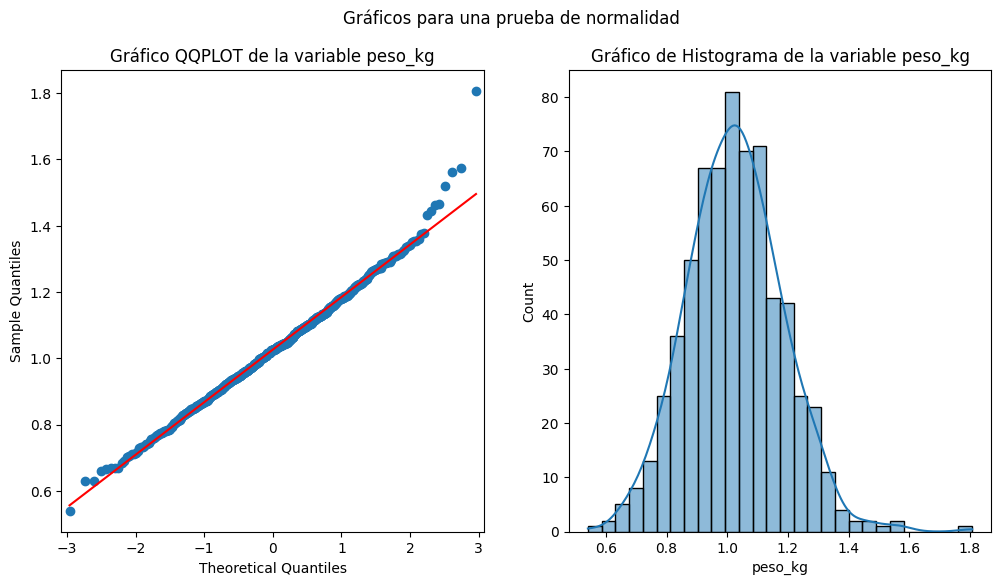

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable peso_kg')
axes[1].set_title('Gráfico de Histograma de la variable peso_kg')

qqplot(data_nutricion_estand['peso_kg'] , line='s', ax=axes[0])
sns.histplot(x='peso_kg', data=data_nutricion_estand, ax=axes[1], kde= True)
plt.show()

In [47]:
# Test de Kolmogorov-Smirnov
# cuando n > 50

stat2, p2 = kstest(data_nutricion_estand['peso_kg'] , 'norm')  #peso_kg
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.743, p-value=0.000


## Normalización con SKLEARN

In [48]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_nutricion_norm_skler = skler.fit_transform(df_num)
data_nutricion_norm_skler

array([[ 1.18678536,  1.69474626,  1.69367901, ...,  1.9958441 ,
         3.32175318,  3.2475333 ],
       [ 1.18678536,  0.48563394, -0.15754476, ...,  0.58942383,
         0.11625847,  1.23048952],
       [ 1.18678536, -0.92499711, -0.77461935, ...,  0.4136213 ,
         0.68193401,  0.39005461],
       ...,
       [ 0.23267432,  0.23669905, -0.29994659, ..., -0.6411939 ,
        -0.07230004,  0.55814159],
       [-0.72143672,  3.76920369,  2.3107536 , ...,  0.06201623,
         0.68193401,  0.89431555],
       [-0.72143672,  0.08259649,  0.41206255, ...,  1.4684365 ,
         1.05905103,  1.56666348]])